<a href="https://colab.research.google.com/github/jgsuarezc/Fotoelasticidad/blob/main/Fotoelastidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 #RGB imagen
import numpy as np
from google.colab import drive #acceder archivos en el  drive
import matplotlib.pyplot as plt 
import math
from google.colab.patches import cv2_imshow


In [2]:
drive.mount('/content/drive/')
#funcion guarda el RGB del pixel x,y
def Pixel(NArchivo,x,y):
  src = cv2.imread(NArchivo)

  scale_percent = 15 # percent of original size
  width = int(src.shape[1] * scale_percent / 100)
  height = int(src.shape[0] * scale_percent / 100)
  dim = (width, height)

  # redimencionar la image
  img=cv2.resize(src, dim, interpolation = cv2.INTER_AREA)

  #dimensiones de la imagen
  #print('Image Dimensions :', img.shape)
  #coordenadas del punto a estudiar
  R=img[x,y,2]
  V=img[x,y,1]
  A=img[x,y,0]
  RGB=[R,V,A]
  #cv2_imshow(img)
  return RGB 

#lista guarda la ruta de acceso de las 36  imagenes 
Directorio= ['drive/MyDrive/Datos fotoelasticidad/1.jpg','drive/MyDrive/Datos fotoelasticidad/2.jpg','drive/MyDrive/Datos fotoelasticidad/3.jpg','drive/MyDrive/Datos fotoelasticidad/4.jpg','drive/MyDrive/Datos fotoelasticidad/5.jpg','drive/MyDrive/Datos fotoelasticidad/6.jpg','drive/MyDrive/Datos fotoelasticidad/7.jpg','drive/MyDrive/Datos fotoelasticidad/8.jpg','drive/MyDrive/Datos fotoelasticidad/9.jpg','drive/MyDrive/Datos fotoelasticidad/10.jpg','drive/MyDrive/Datos fotoelasticidad/11.jpg','drive/MyDrive/Datos fotoelasticidad/12.jpg','drive/MyDrive/Datos fotoelasticidad/13.jpg','drive/MyDrive/Datos fotoelasticidad/14.jpg','drive/MyDrive/Datos fotoelasticidad/15.jpg','drive/MyDrive/Datos fotoelasticidad/16.jpg','drive/MyDrive/Datos fotoelasticidad/17.jpg','drive/MyDrive/Datos fotoelasticidad/18.jpg','drive/MyDrive/Datos fotoelasticidad/19.jpg','drive/MyDrive/Datos fotoelasticidad/20.jpg','drive/MyDrive/Datos fotoelasticidad/21.jpg','drive/MyDrive/Datos fotoelasticidad/22.jpg','drive/MyDrive/Datos fotoelasticidad/23.jpg','drive/MyDrive/Datos fotoelasticidad/24.jpg','drive/MyDrive/Datos fotoelasticidad/25.jpg','drive/MyDrive/Datos fotoelasticidad/26.jpg','drive/MyDrive/Datos fotoelasticidad/27.jpg','drive/MyDrive/Datos fotoelasticidad/28.jpg','drive/MyDrive/Datos fotoelasticidad/29.jpg','drive/MyDrive/Datos fotoelasticidad/30.jpg','drive/MyDrive/Datos fotoelasticidad/31.jpg','drive/MyDrive/Datos fotoelasticidad/32.jpg','drive/MyDrive/Datos fotoelasticidad/33.jpg','drive/MyDrive/Datos fotoelasticidad/34.jpg','drive/MyDrive/Datos fotoelasticidad/35.jpg','drive/MyDrive/Datos fotoelasticidad/36.jpg']

#guarda el BGR de la n-esima foto en un arreglo  de tamaño[36 x 3]
M=np.zeros((len(Directorio),3))
n=0
for Foto in Directorio:
 #112,400
 #330,210

  RGBN=Pixel(Foto,400,112)#n-esima foto
  for i in range(3):
    M[n,i]=RGBN[i]
  n=n+1
RGBT=M/255 # intensidad BGR de las 36 imagenes normalizado


Mounted at /content/drive/


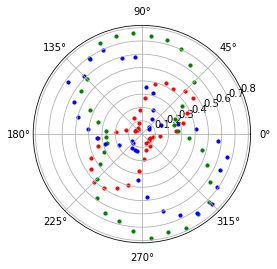

In [15]:

#grafica la intensidad Normalizada vs Angulo  coordenadas polares
theta = np.linspace(np.pi/2,2*np.pi+np.pi/2)
r=np.cos(theta)**2
fig = plt.figure()
ax = fig.add_subplot(projection="polar")
for i in range(36):
  #ax.plot(theta,r)
  ax.scatter(2*np.pi/36*i+np.pi/4,RGBT[i,0],color = 'red' ,s=10,label="Malus")
  ax.scatter(2*np.pi/36*i+np.pi/4,RGBT[i,1], color = 'green',s=10)
  ax.scatter(2*np.pi/36*i+np.pi/4,RGBT[i,2],color = 'blue' ,s=10)
plt.show()


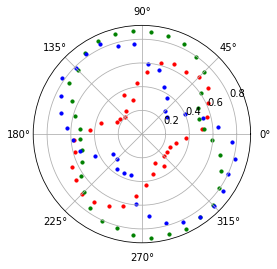

In [14]:
#Campo optico
fig = plt.figure()
ax = fig.add_subplot(projection="polar")
for i in range(36):
  ax.scatter(2*np.pi/36*i+np.pi/4,np.sqrt(RGBT[i,0]),color = 'red' ,s=10,label="Malus")
  ax.scatter(2*np.pi/36*i+np.pi/4,np.sqrt(RGBT[i,1]), color = 'green',s=10)
  ax.scatter(2*np.pi/36*i+np.pi/4,np.sqrt(RGBT[i,2]),color = 'blue' ,s=10)
plt.show()

In [29]:
#para cada  una punto le extrae el maximo y el minimo valor del campo optico
C= ['red','green','blue']
Maximo=np.amax(np.sqrt(RGBT), axis=0)
Minimo=np.amin(np.sqrt(RGBT), axis=0)
thetamax=np.where(RGBT == np.amax(RGBT, axis=0))
#excentrididad
exc=np.zeros(3)
for i in range (3):
  a=Maximo[i]
  b=Minimo[i]
  exc[i]=np.sqrt(a*a-b*b)/a
for i in range(3):
  print(Maximo[i],Minimo[i],exc[i])

print(thetamax[0][0]*10*2*np.pi/360+np.pi/4)




0.7140055472954167 0.20769510081357428 0.9567573440452993
0.883398073839164 0.5009794328681196 0.8236455304310191
0.8631906158060839 0.2581988897471611 0.9542150259713341
3.9269908169872414


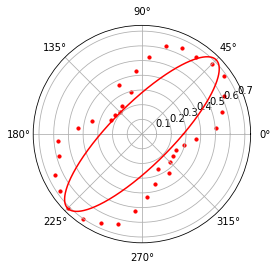

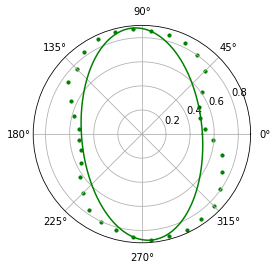

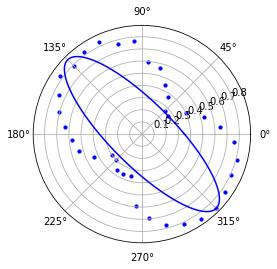

In [33]:

for j in range(3):
  angulomax=thetamax[0][j]*10*2*np.pi/360+np.pi/4
  fig = plt.figure()
  ax = fig.add_subplot(projection="polar")
  theta = np.linspace(0,2*np.pi,1000)
  r = (Minimo[j])/np.sqrt(1-(exc[j]*np.cos(theta-angulomax))**2)
  ax.plot(theta,r,color=C[j])
  for i in range(36):
    ax.scatter(2*np.pi/36*i+np.pi/4,np.sqrt(RGBT[i,j]),color=C[j],s=10)
  plt.show()


  

In [ ]:
#grafica del modulo de la intensidad vs 